In [1]:
import gempyor # incidCshift_delta_R13
from gempyor import seir, config
import pickle
with open('integration_dump.pkl','rb') as fn_dump:
    states, states_daily_incid, ncompartments, nspatial_nodes, ndays, parameters, dt, transitions, proportion_info,  transition_sum_compartments, initial_conditions, seeding_data, seeding_amounts, mobility_data, mobility_row_indices, mobility_data_indices, population,  stochastic_p,  method = pickle.load(fn_dump)


fnct_args = {
    "ncompartments": ncompartments,
    "nspatial_nodes": nspatial_nodes,
    "ndays": ndays,
    "parameters": parameters,
    "dt": dt,
    "transitions": transitions,
    "proportion_info": proportion_info,
    "transition_sum_compartments": transition_sum_compartments,
    "initial_conditions": initial_conditions,
    "seeding_data": seeding_data,
    "seeding_amounts": seeding_amounts,
    "mobility_data": mobility_data,
    "mobility_row_indices": mobility_row_indices,
    "mobility_data_indices": mobility_data_indices,
    "population": population,
    "stochastic_p": stochastic_p,
}

states = gempyor.steps_rk4.rk4_integration(
**fnct_args
)
config_filepath = "config_SMH_R13_pessWan_Var_blk5_rk4_test.yml"
gempyor_simulator = gempyor.InferenceSimulator(
    config_path=config_filepath,
    run_id="FCH_R12_optSev_lowIE_blk5_Mar13",
    prefix="USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/000000005.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)

out_df = gempyor.seir.states2Df(gempyor_simulator.s,  states)
e_new = out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')]
e_new = e_new.reset_index(drop=True).groupby('date').sum()

583it [01:59,  4.90it/s]


  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: FCH_R12_optSev_lowIE_blk5_Mar13,
  gempyor >> prefix: USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/000000005.;


In [4]:
states, states_daily_incid = states

In [6]:
        import numpy as np
        print(
            f"STATES: NNZ:{states[states < 0].size}/{states.size}, max:{np.max(states[states < 0])}, min:{np.min(states[states < 0])}, mean:{np.mean(states[states < 0])} median:{np.median(states[states < 0])}"
        )
        print(
            f"STATES_incid: NNZ:{states_daily_incid[states_daily_incid < 0].size}/{states_daily_incid.size}, max:{np.max(states_daily_incid[states_daily_incid < 0])}, min:{np.min(states_daily_incid[states_daily_incid < 0])}, mean:{np.mean(states_daily_incid[states_daily_incid < 0])} median:{np.median(states_daily_incid[states_daily_incid < 0])}"
        )

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:

fn = 'model_output/hosp/USA/inference/med/2022.03.24.22:30:16.CET/global/intermediate/000000001.000000000.2022.03.24.22:30:16.CET.hosp.parquet'
gempyor.read_df(fn.replace('hosp','hosp')).describe()

In [1]:
import gempyor
from gempyor import seir, config
config_filepath = "config_SMH_R13_pessWan_Var_blk5_rk4_test.yml"
gempyor_simulator = gempyor.InferenceSimulator(
    config_path=config_filepath,
    run_id="FCH_R12_optSev_lowIE_blk5_Mar13",
    prefix="USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/000000005.",
    first_sim_index=1,
    scenario="inference",  # NPIs scenario to use
    deathrate="med",  # Outcome scenario to use
    stoch_traj_flag=False,
    spatial_path_prefix="./",  # prefix where to find the folder indicated in spatial_setup$
)
config.clear()
config.read(user=False)
config.set_file(config_filepath)

#gempyor.read_df('model_output/hnpi/USA/inference/med/2022.03.18.10:52:13.CET/glo')
gempyor_simulator.get_outcome_npi()

  gempyor >> Running ***DETERMINISTIC*** simulation;
  gempyor >> Setup USA_inference; index: 1; run_id: FCH_R12_optSev_lowIE_blk5_Mar13,
  gempyor >> prefix: USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/000000005.;


INFO:root:[Outcomes.NPI] completed in 1.66 s


In [2]:
gempyor_simulator.one_simulation(sim_id2write=6)

Loaded geoids in loaded relative probablity file: 51 Intersect with seir simulation:  51 keeped


/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
INFO:root:[Outcome.structure] completed in 1.16 s
INFO:root:[SEIR.compartments] completed in 627.88 s
INFO:root:[SEIR.NPI] completed in 98.40 s
INFO:root:[Outcomes.NPI] completed in 3.52 s
INFO:root:[onerun_SEIR.seeding] completed in 13.49 s
INFO:root:[SEIR.parameters] completed in 0.22 s
INFO:root:Integrating with method rk4.jit
583it [02:58,  3.26it/s]
INFO:root:[SEIR.compute] completed in 181.61 s
INFO:root:[SEIR.postprocess] completed in 7.97 s
INFO:root:[... reading SEIR sim] completed in 1.02 s
/Users/chadi/opt/miniconda3/envs/covidSProd6/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to 

Parsing the SEIR file took 54.86400842666626s for the 84 it has been done. 
The compute part of outcome took 64.6072883605957 for 336 real outcomes (not sums)


/Users/chadi/Documents/phd/COVIDScenarioPipeline/COVIDScenarioPipeline/gempyor_pkg/src/gempyor/outcomes.py:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  outcomes["time"] = outcomes["date"]
INFO:root:[onerun_delayframe_outcomes.postprocess] completed in 1.48 s
INFO:root:[>>> GEMPYOR onesim (from config)] completed in 1,061.79 s


0

In [ ]:
npi_seir = gempyor_simulator.get_seir_npi(load_ID=True, sim_id2load=5)

In [ ]:

params_draw_arr = gempyor_simulator.get_seir_parameters(load_ID=True, sim_id2load=5)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
parameters = gempyor_simulator.get_seir_parameter_reduced(npi_seir=npi_seir, p_draw=params_draw_arr)  # this is a df. TODO: make it also as.df as option
parameters =  gempyor_simulator.s.parameters.parameters_reduce(params_draw_arr, npi_seir)
parsed_parameters = gempyor_simulator.s.compartments.parse_parameters(
                    parameters, gempyor_simulator.s.parameters.pnames, gempyor_simulator.unique_strings
                )

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path

# import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages


In [ ]:
pdf = PdfPages(f'Unique Parsed Parameter for {config_filepath[:-4]}-slot5.pdf')
d = pdf.infodict()
d["Title"] = "parsed parameters"
d["Author"] = "jlemaitre"

for k,uniq_pname in enumerate(gempyor_simulator.unique_strings):
    if 'r0' in uniq_pname:
        fig, axes = plt.subplots(7, 8, figsize=(20, 30), sharex=True, sharey=True)
        fig.suptitle(uniq_pname, fontsize=22)
        print(uniq_pname)
        for i, geoid in enumerate(gempyor_simulator.s.spatset.nodenames):
            ax = axes.flat[i]
            ax.set_title(geoid)
            ax.grid()
            df = pd.DataFrame(parsed_parameters[k,:,i], index=pd.date_range(gempyor_simulator.s.ti, gempyor_simulator.s.tf, freq="D"))
            ax.plot(df[:'2021-12-31'])
            fig.autofmt_xdate()
        fig.tight_layout()
        pdf.savefig(fig)
pdf.close()

In [ ]:
gempyor_simulator.one_simulation(sim_id2write=6, load_ID=True, sim_id2load=5)

In [ ]:
with open('integration_dump.pkl','rb') as fn_dump:
    states, states_daily_incid, ncompartments, nspatial_nodes, ndays, parameters, dt, transitions, proportion_info,  transition_sum_compartments, initial_conditions, seeding_data, seeding_amounts, mobility_data, mobility_row_indices, mobility_data_indices, population,  stochastic_p,  method = pickle.load(fn_dump)

In [ ]:
import numpy as np

In [ ]:
states[[states_daily_incid < 0]]

In [ ]:
import numpy as np
a = np.load('states_bf.npy')
np.isnan(a).any()

In [ ]:
np.isfinite(-np.inf)

In [ ]:
a[0][a[0] < 2] = -3

In [ ]:
out_df = gempyor.seir.states2Df(gempyor_simulator.s,  gempyor_simulator.debug_states)
out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')].isna().any().any()

In [ ]:
out_df = gempyor.seir.states2Df(gempyor_simulator.s,  gempyor_simulator.states)
out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')].isna().any().any()

In [ ]:
e_old = out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')]
e_old = e_old.reset_index(drop=True).groupby('date').sum()
e_old.to_csv('old.csv')

In [ ]:
e_new = out_df[(out_df['mc_value_type'] == 'incidence') & (out_df['mc_infection_stage'] == 'E')]
e_new = e_new.reset_index(drop=True).groupby('date').sum()

In [ ]:
e_old

/var/folders/y5/jj4qlxkx619gkh07d2zt6h840000gn/T/ipykernel_71231/3505521137.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,7))


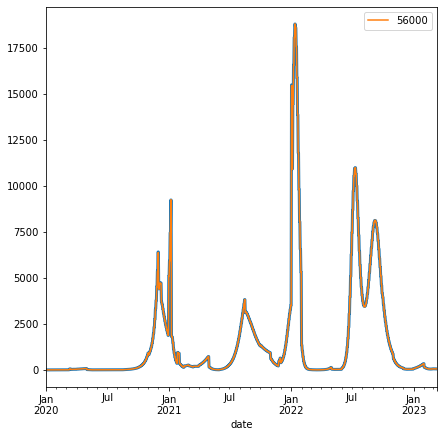

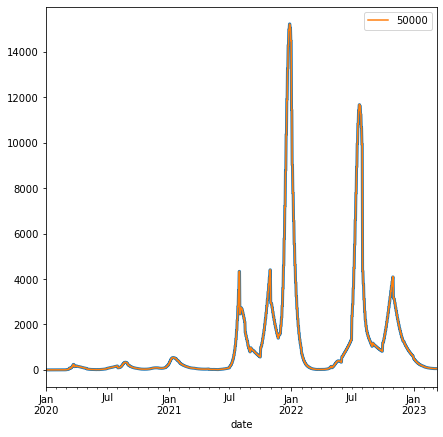

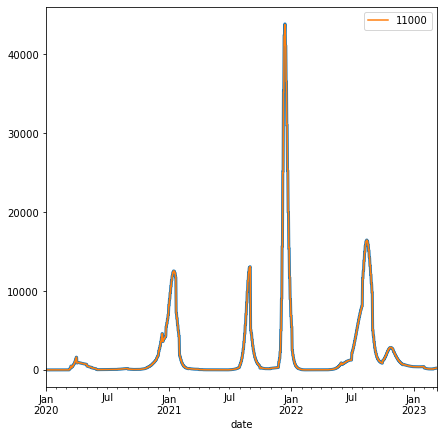

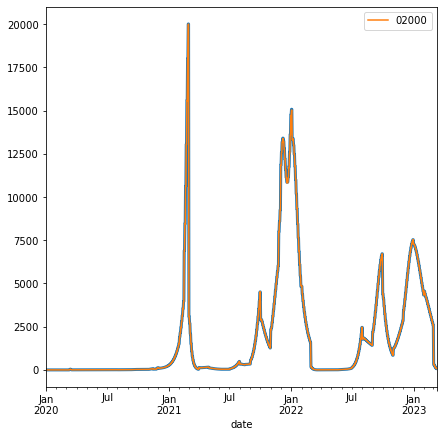

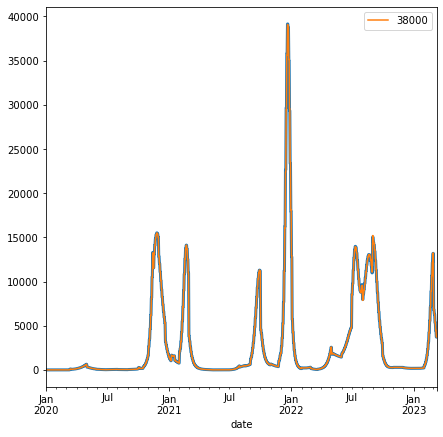

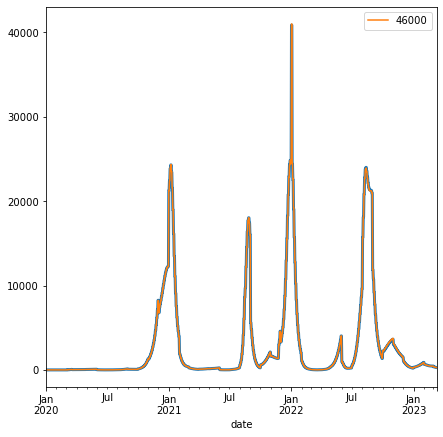

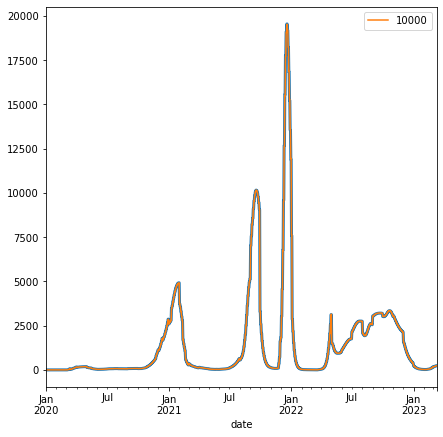

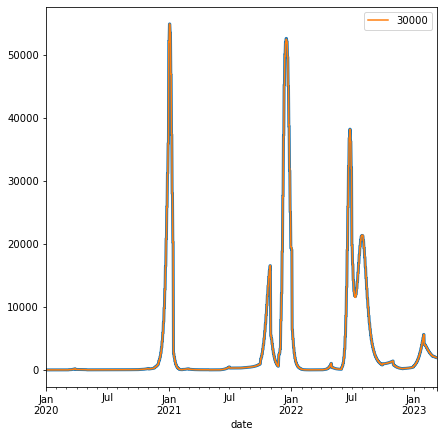

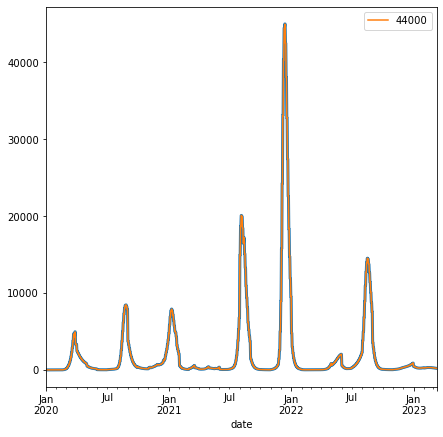

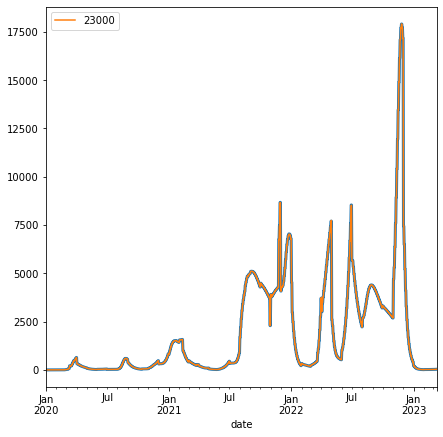

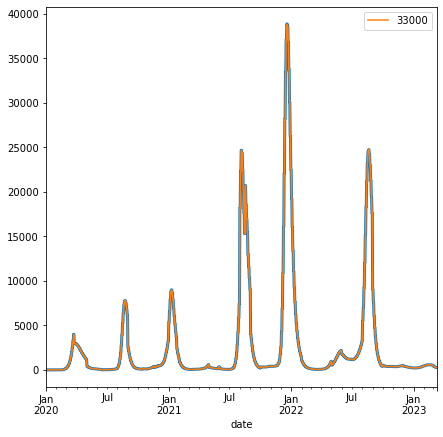

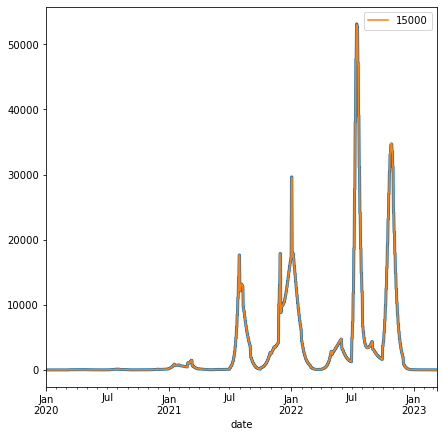

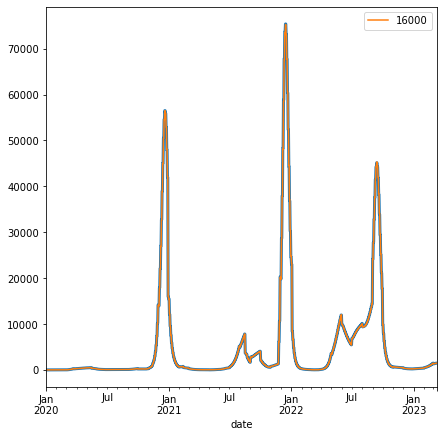

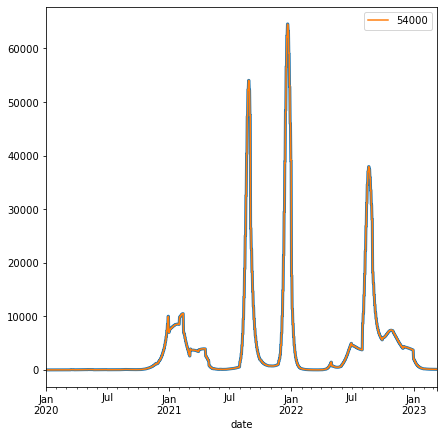

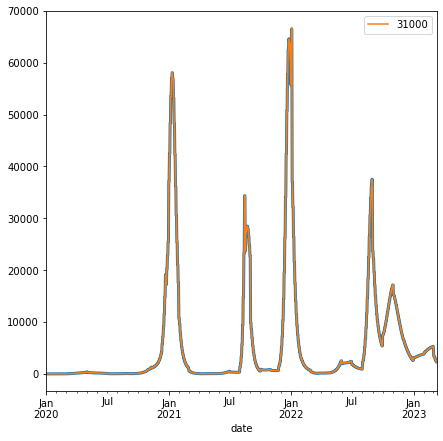

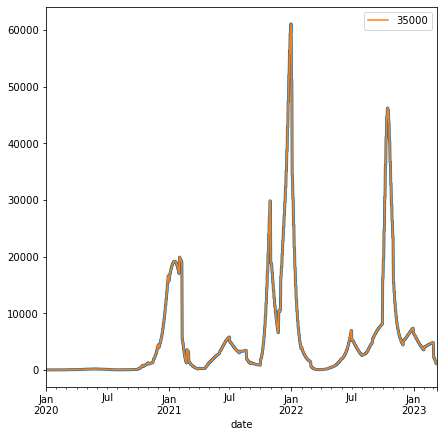

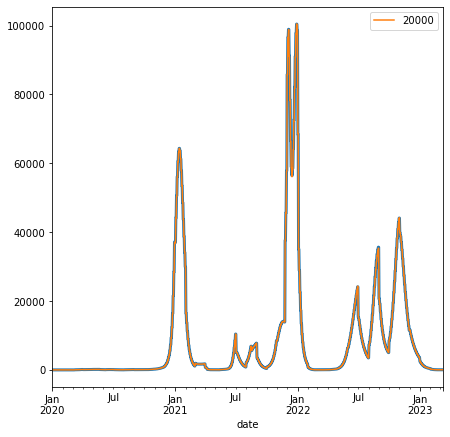

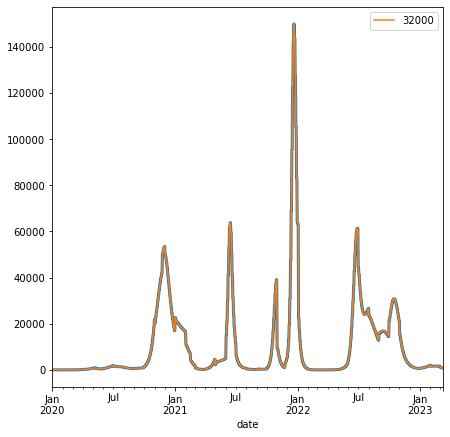

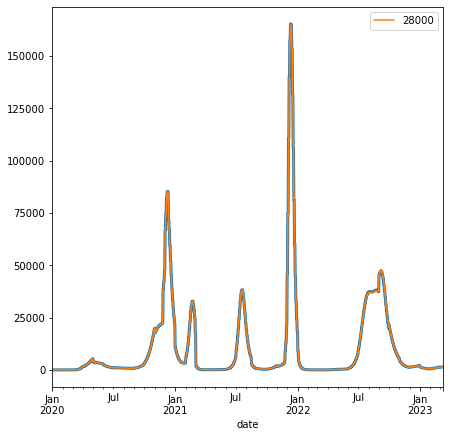

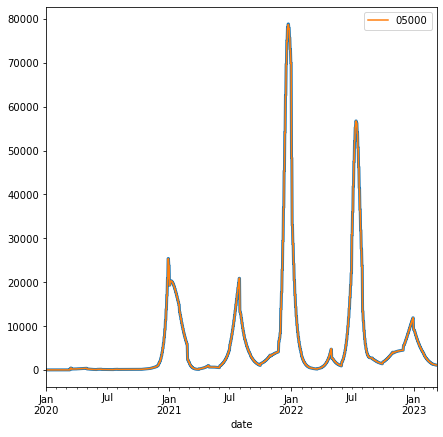

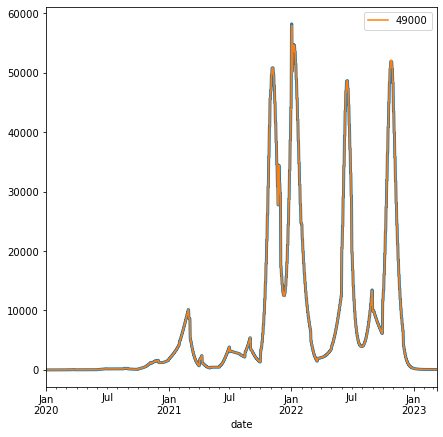

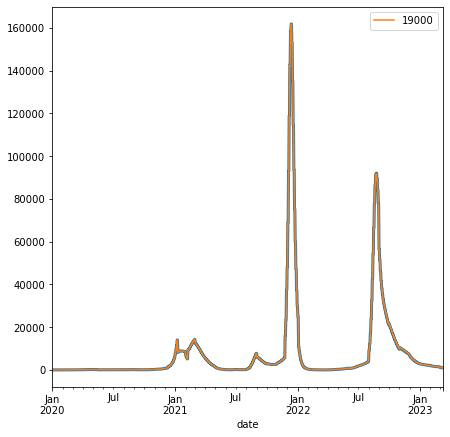

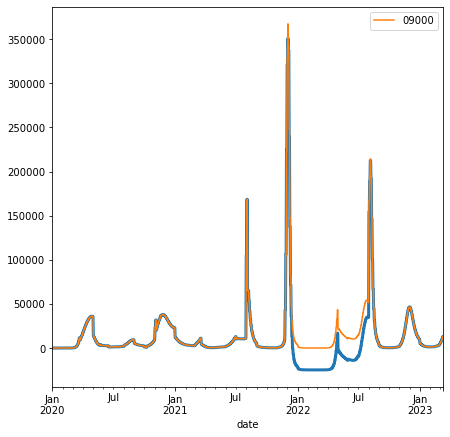

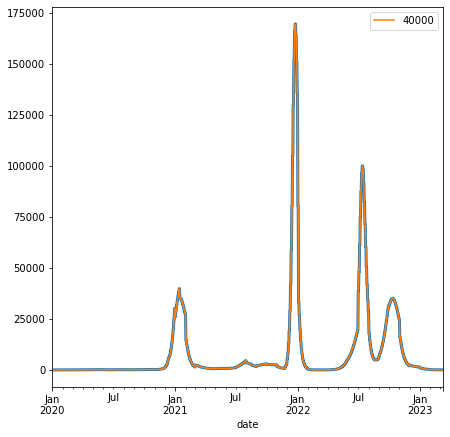

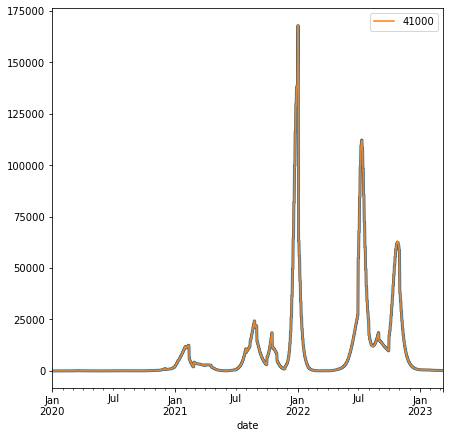

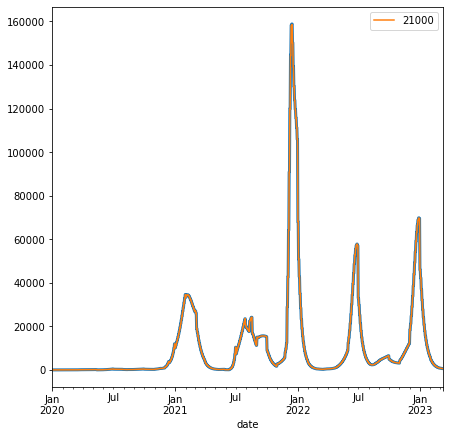

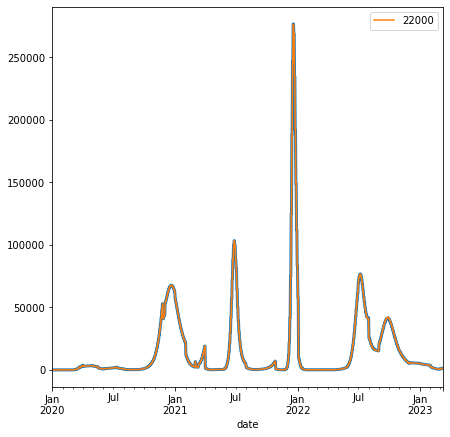

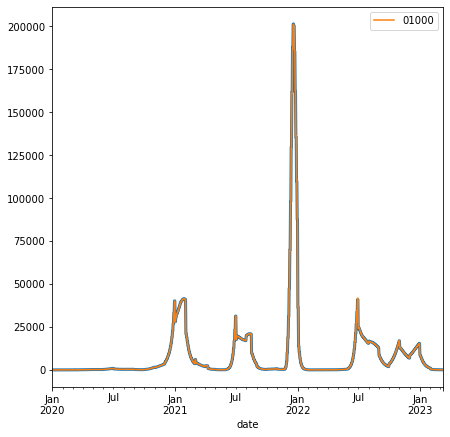

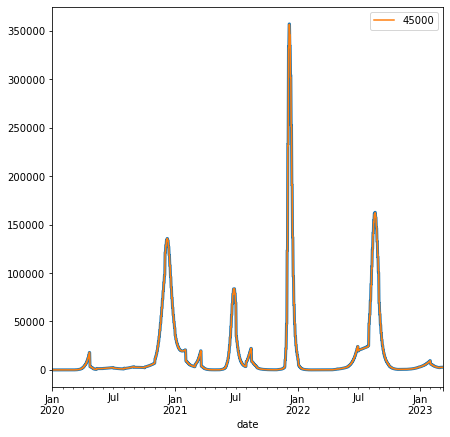

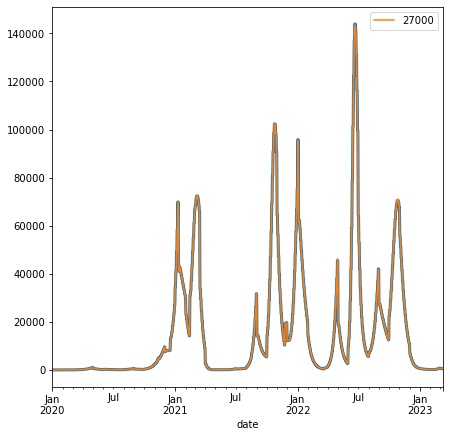

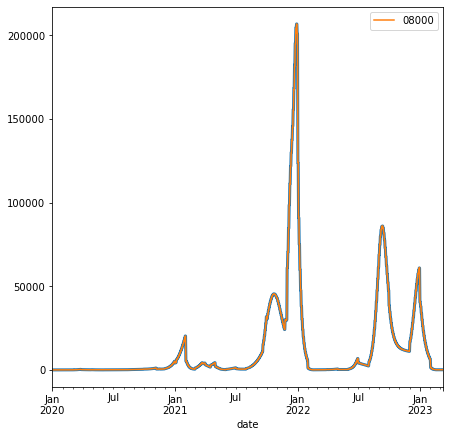

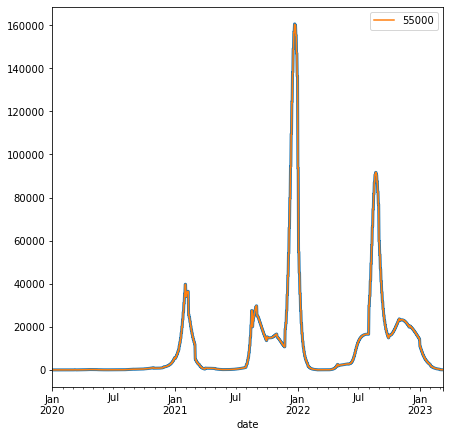

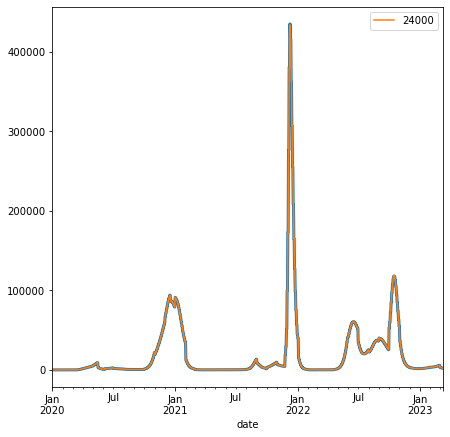

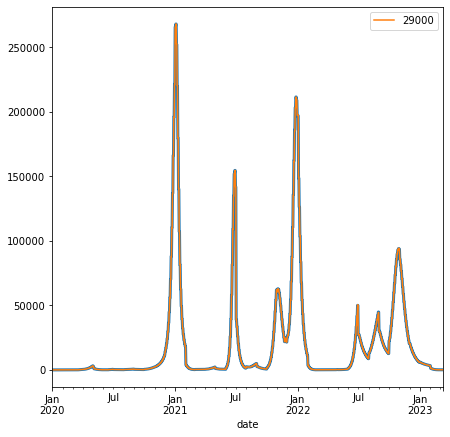

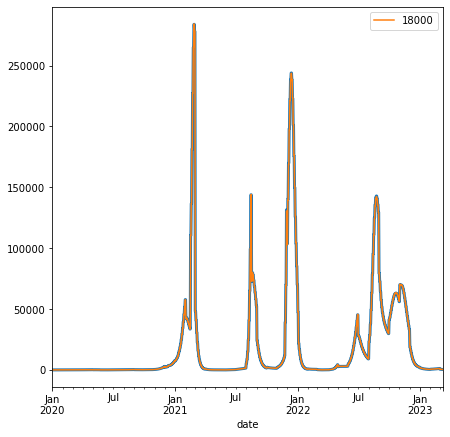

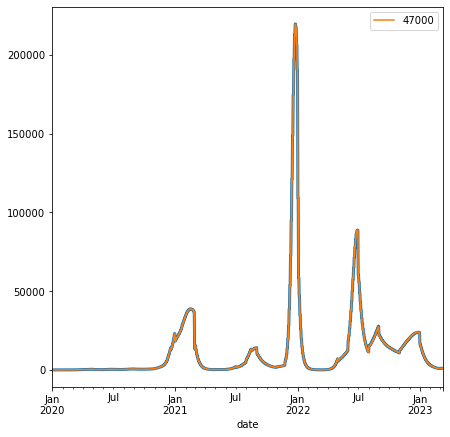

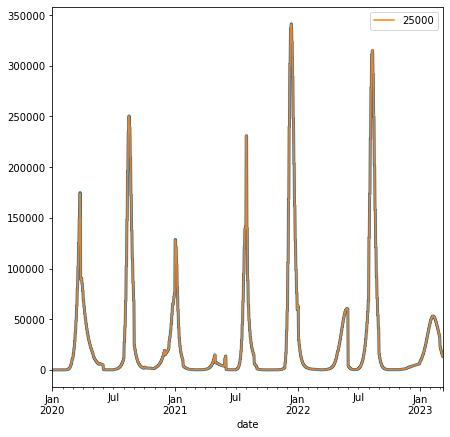

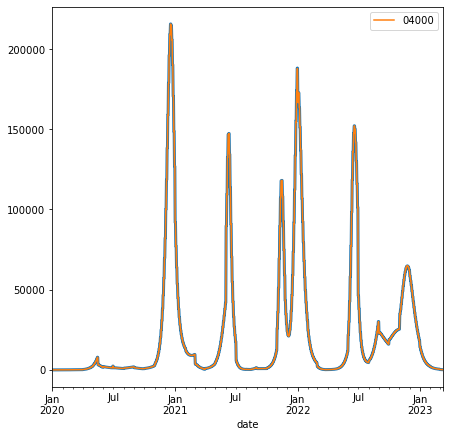

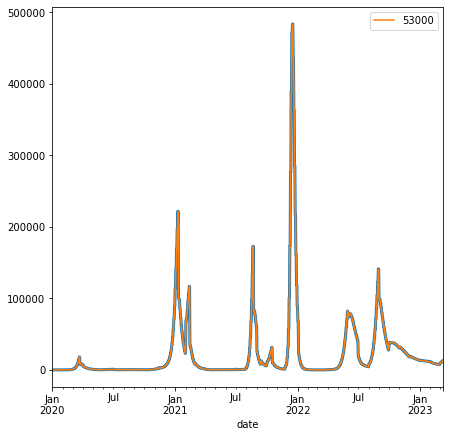

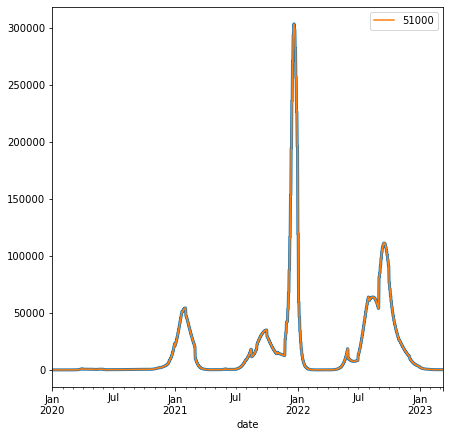

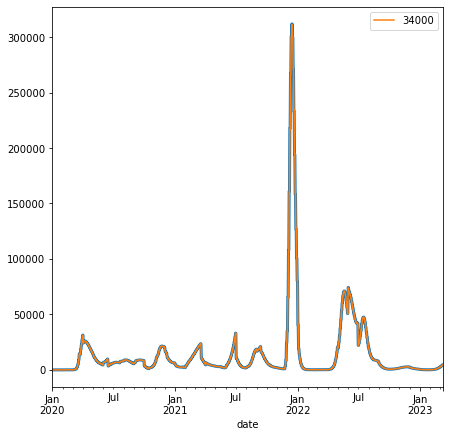

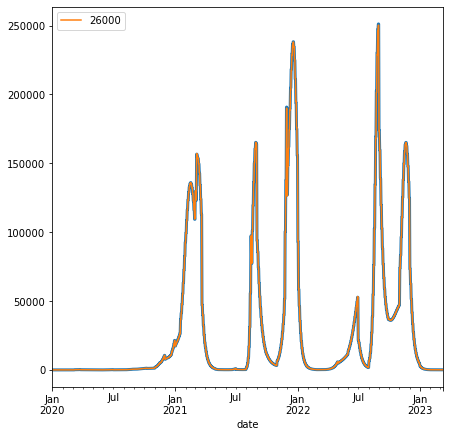

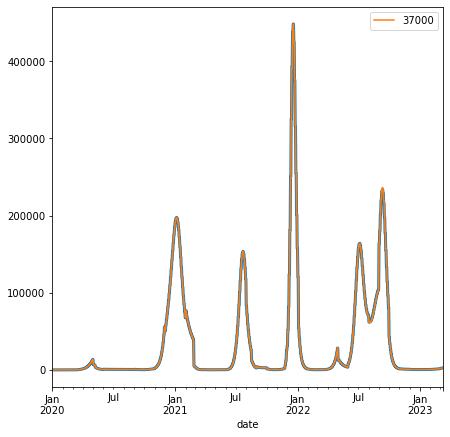

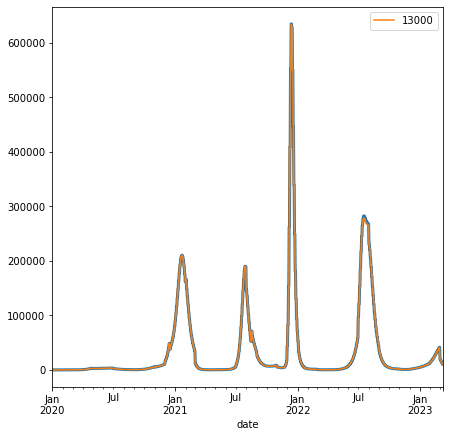

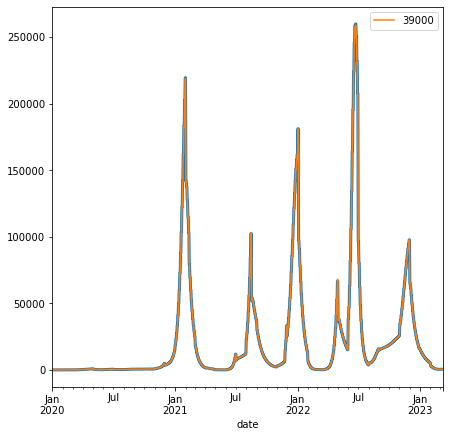

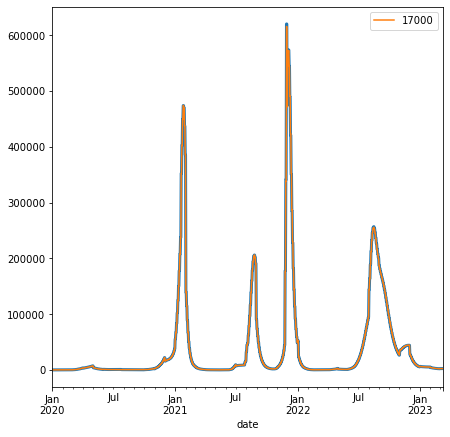

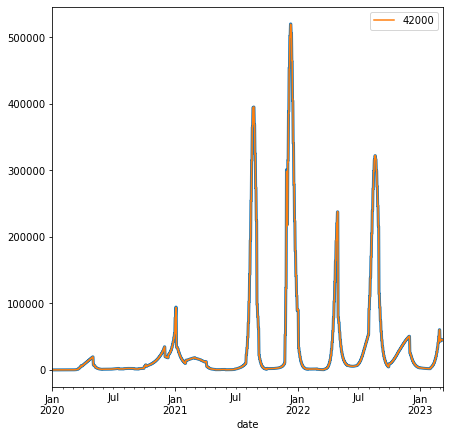

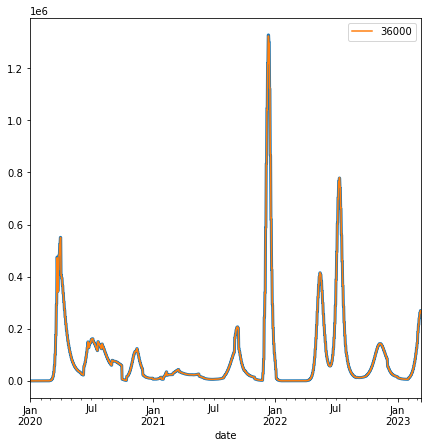

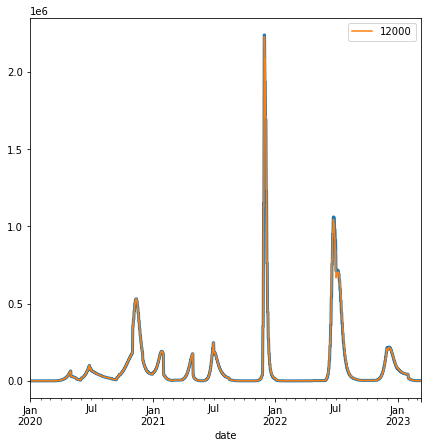

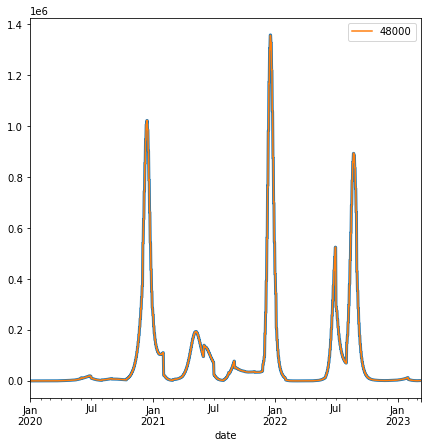

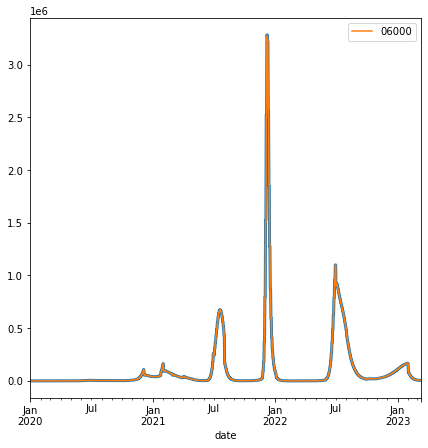

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
e_old = pd.read_csv('old.csv').set_index('date', drop=True)
e_old.index = pd.to_datetime(e_old.index)
for i in e_old.columns:
    plt.figure(figsize=(7,7))
    ax = e_old[i].plot(lw=3)
    e_new[i].plot(ax=ax, legend = 'good')
    

In [ ]:
for i in e_old.columns:
    print(i)
    print(e_old[i] - e_new[i])

In [ ]:
out_df = seir.postprocess_and_write(
                        100, gempyor_simulator.s, gempyor_simulator.states, gempyor_simulator.p_draw, gempyor_simulator.npi_seir, gempyor_simulator.seeding_data
                    )

In [ ]:
np.isnan(gempyor_simulator.seeding_amount).any()

In [ ]:
np.isnan(gempyor_simulator.seeding_data['seeding_sources']).any()

In [ ]:
gempyor_simulator.seeding_data

In [ ]:
a,b = gempyor_simulator.states

In [ ]:
np.isnan(b).any()

In [ ]:
np.arange(0,2)[1]

In [ ]:
gempyor.read_df('model_output/hosp/USA/inference/med/FCH_R12_optSev_lowIE_blk5_Mar13/global/final/000000005.000000006.FCH_R12_optSev_lowIE_blk5_Mar13.hosp.parquet').isna().any().any()

In [ ]:
 int(np.ceil(gempyor_simulator.s.dt))

In [ ]:
gempyor_simulator.s.dt

In [ ]:
gempyor_simulator.get_seir_npi()

```python
npi_seir = (
    gempyor_simulator.get_seir_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_snpi_df>) or (bypass_FN=<some_snpi_filename>)
npi_outcome = (
    gempyor_simulator.get_outcome_npi()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_hnpi_df>) or (bypass_FN=<some_hnpi_filename>)
params_draw_df = (
    gempyor_simulator.get_seir_parametersDF()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
params_draw_arr = (
    gempyor_simulator.get_seir_parameters()
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
param_reduc_from = gempyor_simulator.get_seir_parameter_reduced(
    npi_seir=npi_seir, p_draw=params_draw_arr
)  # could also accept (load_ID=True, sim_id2load=XXX) or (bypass_DF=<some_spar_df>) or (bypass_FN=<some_spar_filename>)
```

In [ ]:
fn= "model_output/hnpi/USA/inference/med/2022.03.18.11:03:20.CET/global/intermediate/000000001.000000000.2022.03.18.11:03:20.CET.hnpi.parquet"
df = gempyor.read_df(fn)
df

In [ ]:
df[df["npi_name"] == "incidCshift_delta_R13"]

In [ ]:
c

In [ ]:
npi_outcome = gempyor_simulator.get_outcome_npi(bypass_FN=fn)

In [ ]:
gempyor_simulator.get_outcome_npi()